# Table of Contents 

1) [Data Dictionary](#Data Dictionary)

2) [Exploratory Data Analysis](#EDA)

3) [Are there differences between people who prefer to date within 
their race and those who do not have a preference?](#imprace)

4) [Predicting Matches](#matches): [Logistic Regression with scoring focused on accuracy](#lr) & [Random Forest Classifier with scoring focused on precision recall](#rfc)
   


## In my research I sought to answer these two questions:
    
    What are the differences between people who prefer to date within 
    their race and those who do not have a preference?
  
    Is it possible to predict matches between two people using limited 
    variables, including self-identified dating preferences? 

### Data Dictionary
<a id = "Data Dictionary"></a>


**Presumption that this study is of heterosexual relationships only**

**Event Fields**

iid : unique id of study participant 

match : 1 = yes & 0 = no ; 1 = both participants would like to see each other again; 0 = one or both of the participants do not want to see each other again

samerace : participant and partner were the same race, 1 = yes & 0 = no 

age_o : age of partner 

race_o : race of partner 

pf_o_att,etc : partner's stated preference at time 1 (similar to attr1_1 see below) for all 6 attributes; fields begining with pf_o or ending with _o

dec_o : decision of partner on whether or not they want to see the participant again

shar_o: how partner rated particioant on shared interests 

like_o: how much partner liked participant 

prob_o: what partner thought the probability was that the participant would like to see them again 

**Scorecard Fields (ratings on attributes and etc. after speed date has taken place):** 

dec : 1 = yes participant would like to see their date again 0 = no
scale of 1-10 rating on date's'attr', 'sinc', 'intel', 'fun', 'amb', 'shar','like',and'prob'. 
(attractiveness, intelligence, fun, ambition, shared interests, and how much the participant likes the date, and 
the probability that the participant thinks their date will say yes to second date with them)

**Signup/Time1 Survey Fields(ratings on attributesa and etc. prior to speed dating event):** 

*What participant finds important in a potential partner:*

attr1_1 = participant's rating of importance of attractiveness in a potential partner waves; 6-9 scale of 1-10 all others waves distribut points out of 100

same for all other attributes with 1_1 ending

*How the participant perceives his or herself:

intel3_1 : how intelligent participant thinks he or she is on a scale of 1-10 

same for all other attributes with 3_1 ending


*Participants interests in activites are on a scale of 1-10

    'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
    'gaming', 'clubbing', 'reading','tv', 'theater', 'movies', 'concerts','music', 'shopping', 'yoga'

*goal : participant's primary goal for taking part in the speed dating event:
    
    1 = seemed like a fun night out
    
    2 = to meet new people
    
    3 = to get a date
    
    4 = looking for a serious relationship
    
    5 = to say I did it
    
    6 = other

*date : how frequently the participant goes out on a date
    Several times a week=1
    
    Twice a week=2; Once a week=3
    
    Twice a month=4
    
    Once a month=5
    
    Several times a year=6
    
    Almost never=7
*go_out : How often do you go out (not necessarily on dates)
    
    Several times a week=1
    
    Twice a week=2
    
    Once a week=3
    
    Twice a month=4
    
    Once a month=5
    
    Several times a year=6
    
    Almost never=7

*imprelig : How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?

*imprace = importance of have a partner with the samerace on a scale of 1-10

** DataFrames **

    *demop_df: participant demographic information with removed duplicate subject IDs
    *hi_df: those participants who report a preference for dating within their race
    *lw_df: those participants who report little or no preference for dating within their race
    *matches_df: speed date ratings and match results for all dates in the study 



## Exploratory Data Analysis 
<a id = "EDA"></a>

In [1]:
#import required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#import csv and convert to dataframe
Q1= pd.read_csv('../../projects/capstone-projects/speed-dating-experiment/Speed Dating Data.csv')

In [3]:
# remove duplicate subject iids for accuracy of participant demographic information
demop_df =  Q1[["iid", "wave", "gender","age", "race","imprace","imprelig","goal","date","go_out", 
                "attr1_1","sinc1_1","intel1_1","fun1_1", 
                "amb1_1","shar1_1","attr3_1", "sinc3_1", "fun3_1", "intel3_1", "amb3_1",
                "attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1",'sports', 'tvsports', 
                'exercise', 'dining', 'museums', 'art', 'hiking', 
                'gaming', 'clubbing', 'reading','tv', 'theater', 'movies', 
                'concerts','music', 'shopping', 'yoga','dec', 'attr', 'sinc', 'intel', 
                'fun', 'amb', 'shar', 'like', 'prob', 'met']]

# sort subject ids
demop_df.sort_values(['iid','wave'], inplace=True)

# drop duplicates 
demop_df.drop_duplicates(['iid'], inplace=True)

#drop null values;not comfortable imputing given that many fields reflect personal opinions and preferences
demop_df.dropna(inplace = True)

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ltdanp21/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)
/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
#confirmation that all null values were dropped
#demop_df.isnull().sum()

#### Basic Descriptive Statistics

In [5]:
#251 participants after null values dropped;#554 participants reported in study key 
#251 rows and 53 columns

demop_df.shape

(251, 53)

In [6]:
#number of males and females
#127 females
#124 males
#3 more females than males 
demop_df.gender.value_counts()

0    127
1    124
Name: gender, dtype: int64

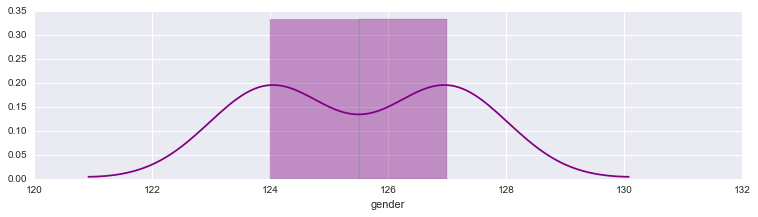

In [7]:
#ask K or David;%
fig_gen = plt.figure(figsize=(12.7,3),dpi=300)
sns.distplot(demop_df.gender.value_counts(), color = "purple")

In [8]:
# ages of participants
age_series= demop_df.age.value_counts()
print age_series

27.0    34
24.0    28
25.0    27
26.0    26
23.0    25
29.0    22
30.0    21
28.0    21
22.0    15
33.0     8
34.0     7
32.0     6
21.0     4
31.0     2
55.0     1
38.0     1
35.0     1
36.0     1
20.0     1
Name: age, dtype: int64


In [9]:
# median age
demop_df.age.median()

26.0

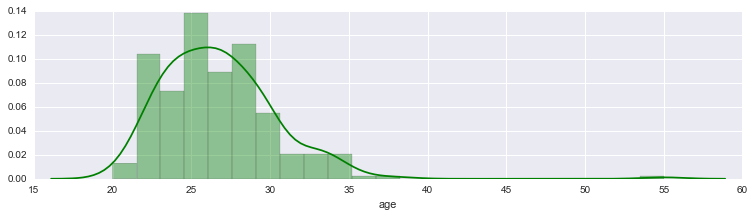

In [10]:
#ask K or David;%
#plot age distribution
fig_age = plt.figure(figsize=(12.7,3),dpi=300)
sns.distplot(demop_df.age, color = "green")

In [11]:
# racial demographics

# 2 = White 52% 
# 4 = Asian/Pacific_Islander/Asian_American 28%
# 3 = Latino/Hispanic_American 8 % 
# 6 = Other 8 % 
# 1 = Black 4 % 

# 5 = Native American, there were none in this study

from __future__ import division

# race 
race_val_list = list(demop_df.race.value_counts())

percenp_race = []

for r in race_val_list:
    a = r/251
    b = a * 100
    percenp_race.append(round(b))

In [12]:
# percentage of study population each race makes up 
percenp_race

[52.0, 28.0, 8.0, 8.0, 4.0]

In [13]:
#average number of people in waves
avg_part_waves = demop_df.groupby(['wave'])["iid"].count().mean()
print round(avg_part_waves)

21.0


## Are there differences between people who prefer to date within their race and those who do not have a preference?
<a id = "imprace"></a>

In [14]:
#women show slight preference for dating within race
woman_mask = ((demop_df.gender == 0) & (demop_df.imprace >= 5))
demop_df[woman_mask].imprace.value_counts().sum()

46

In [15]:
male_mask = ((demop_df.gender == 1) & (demop_df.imprace >= 5))
demop_df[male_mask].imprace.value_counts().sum()

35

#### Subset data frame to reflect those particpants who show preference for dating within their race

In [16]:
# imprace = 8,9,10
imp_mask_high = demop_df.imprace > 7

In [17]:
# INITIAL df 
high_df = demop_df[imp_mask_high]

# subset out waves 6-9 due to difference in rating (see data dictionary)
wave_69 = ((demop_df.wave != 6) & (demop_df.wave != 7) & (demop_df.wave != 8) & (demop_df.wave != 9))

In [18]:
#final df
hi_df = high_df[wave_69]

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [19]:
# 32 people have a strong preference for dating in the same race 
hi_df.shape

(32, 53)

#### Subset data frame to reflect those particpants who show no preference for dating within their race

In [20]:
# imprace 1,2,3,4
imp_mask_low = demop_df.imprace < 5

In [21]:
# INITIAL df 
low_df = demop_df[imp_mask_low]

# subset out waves 6-9
wave_69_l = ((demop_df.wave != 6) & (demop_df.wave != 7) & (demop_df.wave != 8) & (demop_df.wave != 9))

In [22]:
# final df 
lw_df = low_df[wave_69_l]

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [23]:
#  170 of participants show no strong preference for dating within their race
lw_df.shape

(170, 53)

In [24]:
#print list(lw_df.columns)

##### Is there a difference in what one group finds important in a potential partner vs. the other?

In [25]:
#ratings of importance of six attributes in a potential partner:
#attractiveness,sincerity,intelligence,fun,ambition, and shared interest
att_list= ['attr1_1',"sinc1_1",'intel1_1',"fun1_1","amb1_1","shar1_1"]

for average in att_list:
    print average
    print "no strong preference:",round(lw_df[average].mean())
    print "strong preference:",round(hi_df[average].mean())

attr1_1
no strong preference: 23.0
strong preference: 25.0
sinc1_1
no strong preference: 18.0
strong preference: 17.0
intel1_1
no strong preference: 20.0
strong preference: 21.0
fun1_1
no strong preference: 17.0
strong preference: 17.0
amb1_1
no strong preference: 10.0
strong preference: 10.0
shar1_1
no strong preference: 12.0
strong preference: 10.0


#### Is there a difference in how participants in one group perceive themselves  vs. the other?

In [26]:
#participants ratings of self of six attributes 
att_list= ['attr3_1',"sinc3_1",'intel3_1',"fun3_1","amb3_1"]

for average in att_list:
    print average
    print "no strong preference:",round(lw_df[average].mean())
    print "strong preference:",round(hi_df[average].mean())

attr3_1
no strong preference: 7.0
strong preference: 8.0
sinc3_1
no strong preference: 8.0
strong preference: 9.0
intel3_1
no strong preference: 8.0
strong preference: 9.0
fun3_1
no strong preference: 8.0
strong preference: 8.0
amb3_1
no strong preference: 7.0
strong preference: 8.0


#### Is there a difference in how participants in one group think others perceive them vs. the other?

In [27]:
#participants ratings on how they think other's perceive them on the 5 attributes 
att_list= ['attr5_1',"sinc5_1",'intel5_1',"fun5_1","amb5_1"]

for average in att_list:
    print average
    print "no strong preference:",round(lw_df[average].mean())
    print "strong preference:",round(hi_df[average].mean())

attr5_1
no strong preference: 7.0
strong preference: 7.0
sinc5_1
no strong preference: 8.0
strong preference: 9.0
intel5_1
no strong preference: 8.0
strong preference: 9.0
fun5_1
no strong preference: 7.0
strong preference: 8.0
amb5_1
no strong preference: 8.0
strong preference: 9.0


#### Is there a difference in what one group likes to do with their free time  vs. the other?

In [28]:
act_list = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 
            'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

for average in act_list:
    print average
    print "no strong preference:",round(lw_df[average].mean())
    print "strong preference:",round(hi_df[average].mean())

sports
no strong preference: 6.0
strong preference: 6.0
tvsports
no strong preference: 4.0
strong preference: 5.0
exercise
no strong preference: 6.0
strong preference: 7.0
dining
no strong preference: 8.0
strong preference: 9.0
museums
no strong preference: 7.0
strong preference: 7.0
art
no strong preference: 7.0
strong preference: 7.0
hiking
no strong preference: 6.0
strong preference: 6.0
gaming
no strong preference: 4.0
strong preference: 4.0
clubbing
no strong preference: 6.0
strong preference: 5.0
reading
no strong preference: 8.0
strong preference: 8.0
tv
no strong preference: 5.0
strong preference: 7.0
theater
no strong preference: 7.0
strong preference: 8.0
movies
no strong preference: 8.0
strong preference: 8.0
concerts
no strong preference: 7.0
strong preference: 7.0
music
no strong preference: 8.0
strong preference: 8.0
shopping
no strong preference: 6.0
strong preference: 7.0
yoga
no strong preference: 4.0
strong preference: 5.0


#### Is there a difference in how one group rates the importance of having a partner with the same religion vs. the other?

In [29]:
print "no strong preference:",round(lw_df['imprelig'].mean())
print "strong preference:",round(hi_df['imprelig'].mean())

no strong preference: 3.0
strong preference: 6.0


#### Is there a difference one group's goal for participating in the event vs. the other?

In [30]:
print "no strong preference:",round(lw_df['goal'].mean())
print "strong preference:",round(hi_df['goal'].mean())

no strong preference: 2.0
strong preference: 2.0


#### Is there a difference in how often participants from one group go out on a date vs. the other?

In [31]:
print "no strong preference:",round(lw_df['date'].mean())
print "strong preference:",round(hi_df['date'].mean())

no strong preference: 5.0
strong preference: 5.0


#### Is there a difference in how often participants from one group go out (not necessarily a date) vs. the other?

In [32]:
print "no strong preference:",round(lw_df['go_out'].mean())
print "strong preference:",round(hi_df['go_out'].mean())

no strong preference: 2.0
strong preference: 2.0


## Predicting Matches 
<a id = "matches"></a>

**Hypothesis: a match between two people in a speed date can be predicted by:**
    
    -personal demographics of participant (e.g. gender, race, and age)

    -reason for participating in speed dating event

    -what the participant finds important in a partner

    -how the participant rates their partner on attractiveness,sincerity, intelligence, fun, ambition, and shared 
    interests after the speed date

    -what the participant thinks the probability their partner saying yes to another date with them is

    -how much the participant like their partner after being on a speed date with him or her

**Modeling approach:**

Since my target variable was categorical and my goal to interpret the effects of my predictors on my response variable, I chose Logistic Regression and Decision Tree models. 

#### Subset data frame to speed date ratings,match results and etc. for all dates in the study

In [33]:

df_master = pd.read_csv("../capstone-projects/speed-dating-experiment/Speed Dating Data.csv")
#df of null values 
null_df = pd.DataFrame(df_master.isnull().sum())
#Delete columns with large amount of null values and not important to hypothesis
df_master.drop(df_master[['match_es','attr1_s','sinc1_s','intel1_s','fun1_s','amb1_s','shar1_s','attr3_s','sinc3_s',
 'intel3_s','fun3_s','amb3_s',
 'satis_2',
 'length',
 'numdat_2',
 'attr7_2',
 'sinc7_2',
 'intel7_2',
 'fun7_2',
 'amb7_2',
 'shar7_2',
 'attr1_2',
 'sinc1_2',
 'intel1_2',
 'fun1_2',
 'amb1_2',
 'shar1_2',
 'attr4_2',
 'sinc4_2',
 'intel4_2',
 'fun4_2',
 'amb4_2',
 'shar4_2',
 'attr2_2',
 'sinc2_2',
 'intel2_2',
 'fun2_2',
 'amb2_2',
 'shar2_2',
 'attr3_2',
 'sinc3_2',
 'intel3_2',
 'fun3_2',
 'amb3_2',
 'attr5_2',
 'sinc5_2',
 'intel5_2',
 'fun5_2',
 'amb5_2',
 'you_call',
 'them_cal',
 'date_3',
 'numdat_3',
 'num_in_3',
 'attr1_3',
 'sinc1_3',
 'intel1_3',
 'fun1_3',
 'amb1_3',
 'shar1_3',
 'attr7_3',
 'sinc7_3',
 'intel7_3',
 'fun7_3',
 'amb7_3',
 'shar7_3',
 'attr4_3',
 'sinc4_3',
 'intel4_3',
 'fun4_3',
 'amb4_3',
 'shar4_3',
 'attr2_3',
 'sinc2_3',
 'intel2_3',
 'fun2_3',
 'amb2_3',
 'shar2_3',
 'attr3_3',
 'sinc3_3',
 'intel3_3',
 'fun3_3',
 'amb3_3',
 'attr5_3',
 'sinc5_3',
 'intel5_3',
 'fun5_3',
 'amb5_3',"int_corr",'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',]], axis=1, inplace=True)

In [34]:
#Delete columns with large amount of null values and not important to hypothesis
df_master.drop(df_master[['field','field_cd',
 'undergra',
 'mn_sat',
 'tuition',
'zipcode',
 'income',
'career',
'career_c',
 'exphappy',
 'expnum',
'attr4_1',
 'sinc4_1',
 'intel4_1',
 'fun4_1',
 'amb4_1',
 'shar4_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'attr5_1',
 'sinc5_1',
 'intel5_1',
 'fun5_1',
 'amb5_1',"positin1"]],axis = 1, inplace = True)

In [35]:
#drop nans from columns that are needed
df_master.dropna(inplace=True)
#confirm no nulls
#df_master.isnull().sum()

In [36]:
# Dataframe for predicting matches 
matches_df = df_master[['iid','gender','wave','partner','match','samerace','age','race','goal','date','go_out',
'age_o','race_o','pf_o_att',
'pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','attr_o','sinc_o','intel_o','fun_o','amb_o',
'shar_o','like_o','prob_o','imprace','imprelig','attr','sinc','intel','fun',
'amb','shar','like','prob','attr1_1',"sinc1_1",'intel1_1',"fun1_1","amb1_1","shar1_1"]]

In [37]:
#sort dataframe by subject iid
matches_df.sort_values(["iid"],inplace = True)

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


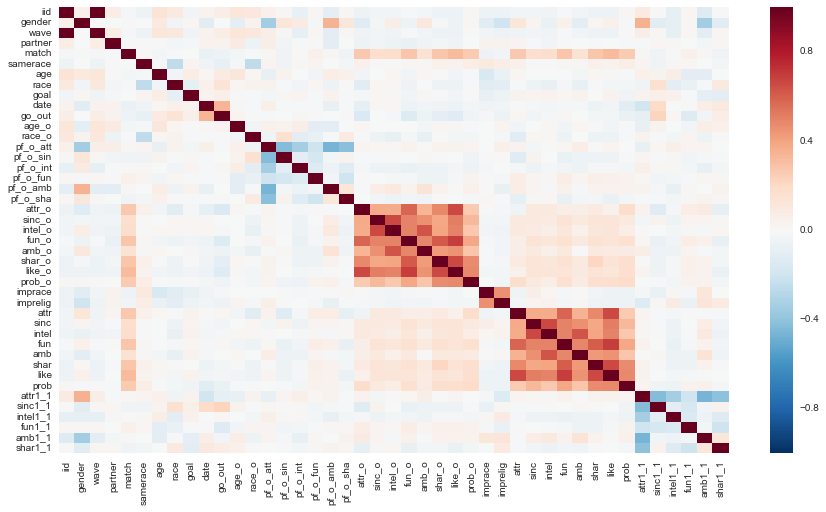

In [38]:
#heat map of variable correlations
# we see here that how people rate each after each date are the strongest predictors of a possible match
fig_heat = plt.figure(figsize=(15,8))
sns.heatmap(matches_df.corr())

In [39]:
#number of dates in the study 5,454 (includes duplicate rows-similar to bootstapping?)
matches_df.shape

(5454, 43)

In [40]:
#proportion of matches and non-matches
#4486 non-matches: 83% of total possible outcomes 
#968 matches: 17% of total possible outcomes
# may have recall issues
matches_df.match.value_counts()

0    4486
1     968
Name: match, dtype: int64

#### Logistic Regression with scoring focused on accuracy 
<a id = "lr"></a>

In [41]:
import patsy
from patsy import dmatrices

In [42]:
#create formula
# gender already dummy coded
lr_formula = """ match ~ gender + age + C(race) + C(goal) + C(date) + C(go_out) +
age_o + C(race_o) + attr_o + sinc_o +intel_o + fun_o + amb_o + shar_o + like_o + prob_o + 
+ imprace + imprelig + attr + sinc + intel + fun + amb + shar + like + prob + 
+ pf_o_att + pf_o_sin + pf_o_int + pf_o_fun + pf_o_amb + pf_o_sha + 
attr1_1 + sinc1_1 + intel1_1 + fun1_1 + amb1_1 + shar1_1 -1""" 

In [43]:
#create X and Y columns 
Y_lr,X_lr = patsy.dmatrices(lr_formula,data=matches_df, return_type = "dataframe")

In [44]:
#normalize predictor columns
from sklearn.preprocessing import StandardScaler
ls_ss = StandardScaler()

x_lr = ls_ss.fit_transform(X_lr)

In [45]:
#instantiate LR model for gridsearch
from sklearn.linear_model import LogisticRegression
lr_grid = LogisticRegression()

In [46]:
from sklearn.grid_search import GridSearchCV

# grid search

#alpha strength
#e.g. 10 to X power; x = -5 - 1 in increments of 20
Cs_lr = np.logspace(-5,1, 20)
   
#specify parameters you would like searched
search_parameters_lr = { 
    "penalty":             ['l1','l2'],   
    "C":                   Cs_lr, 
    "class_weight":        [None, "balanced"]
}

# instantiate gridserach
# pass model,search parameters, set cross validation number, and print out of process to 1)
lr_gridCV = GridSearchCV(lr_grid, search_parameters_lr, cv = 4, verbose = 1)

In [47]:
#put Y column in correct format for grid search
y_lr = np.ravel(Y_lr)

In [48]:
#fit gridsearch with data

#pass normalized preditors and then response variable
lr_gridCV.fit(x_lr,y_lr)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    4.8s
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   20.6s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   2.06914e-05,   4.28133e-05,   8.85867e-05,
         1.83298e-04,   3.79269e-04,   7.84760e-04,   1.62378e-03,
         3.35982e-03,   6.95193e-03,   1.43845e-02,   2.97635e-02,
         6.15848e-02,   1.27427e-01,   2.63665e-01,   5.45559e-01,
         1.12884e+00,   2.33572e+00,   4.83293e+00,   1.00000e+01]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [49]:
print "Best C / Regularization Param:", lr_gridCV.best_estimator_.C # This estimator.best_estimator_ object has many great reporting metrics
print "Best Params:", lr_gridCV.best_params_
print "Best Score:", lr_gridCV.best_score_
print "baseline:",np.mean(y_lr)

Best C / Regularization Param: 0.0143844988829
Best Params: {'penalty': 'l1', 'C': 0.01438449888287663, 'class_weight': None}
Best Score: 0.842867620095
baseline: 0.177484415108


In [50]:
#instantiate lr model and fit to pull coefficients 


#pass liblinear solver and best parameters
lr_coef = LogisticRegression(solver='liblinear', penalty = 'l1', C = 0.01438449888287663, class_weight = None)
lr_coef.fit(X_lr,y_lr)

LogisticRegression(C=0.0143844988829, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [51]:
#cross value score to validate model
from sklearn.cross_validation import cross_val_score

lr_scores = cross_val_score(lr_coef,x_lr,y_lr,cv = 4)

##### Model is consistently predicting at an overall score of 84.28%,significantly higher than the baseline model.

In [52]:
print "model scores for each validation:",lr_scores
print "mean of model scores:",np.mean(lr_scores)
print "baseline:",np.mean(y_lr)

model scores for each validation: [ 0.84017595  0.84750733  0.84079237  0.8429934 ]
mean of model scores: 0.842867262787
baseline: 0.177484415108


In [53]:
#predictions
y_pred = lr_coef.predict(X_lr)

In [54]:
#coefficients
lr_coefv = lr_coef.coef_
#intercept
lr_coefi = lr_coef.intercept_
#Print coefficients and intercept 
#print lr_coefv
#print lr_coefi

In [55]:
#visualize coefficients 

#first create dataframe of coefficents 

#predictor column from dmatrices
lr_predictors = X_lr.columns
#coefficents; call attribut and acess values
lrcoef = lr_coefv[0]

#turn dictionary of predicor columns and coef values into dataframe

coef_df = pd.DataFrame({"predictors":lr_predictors, "coefficients":lrcoef})

In [56]:
coef_df.sort_values(["coefficients"],inplace = True, ascending = False)

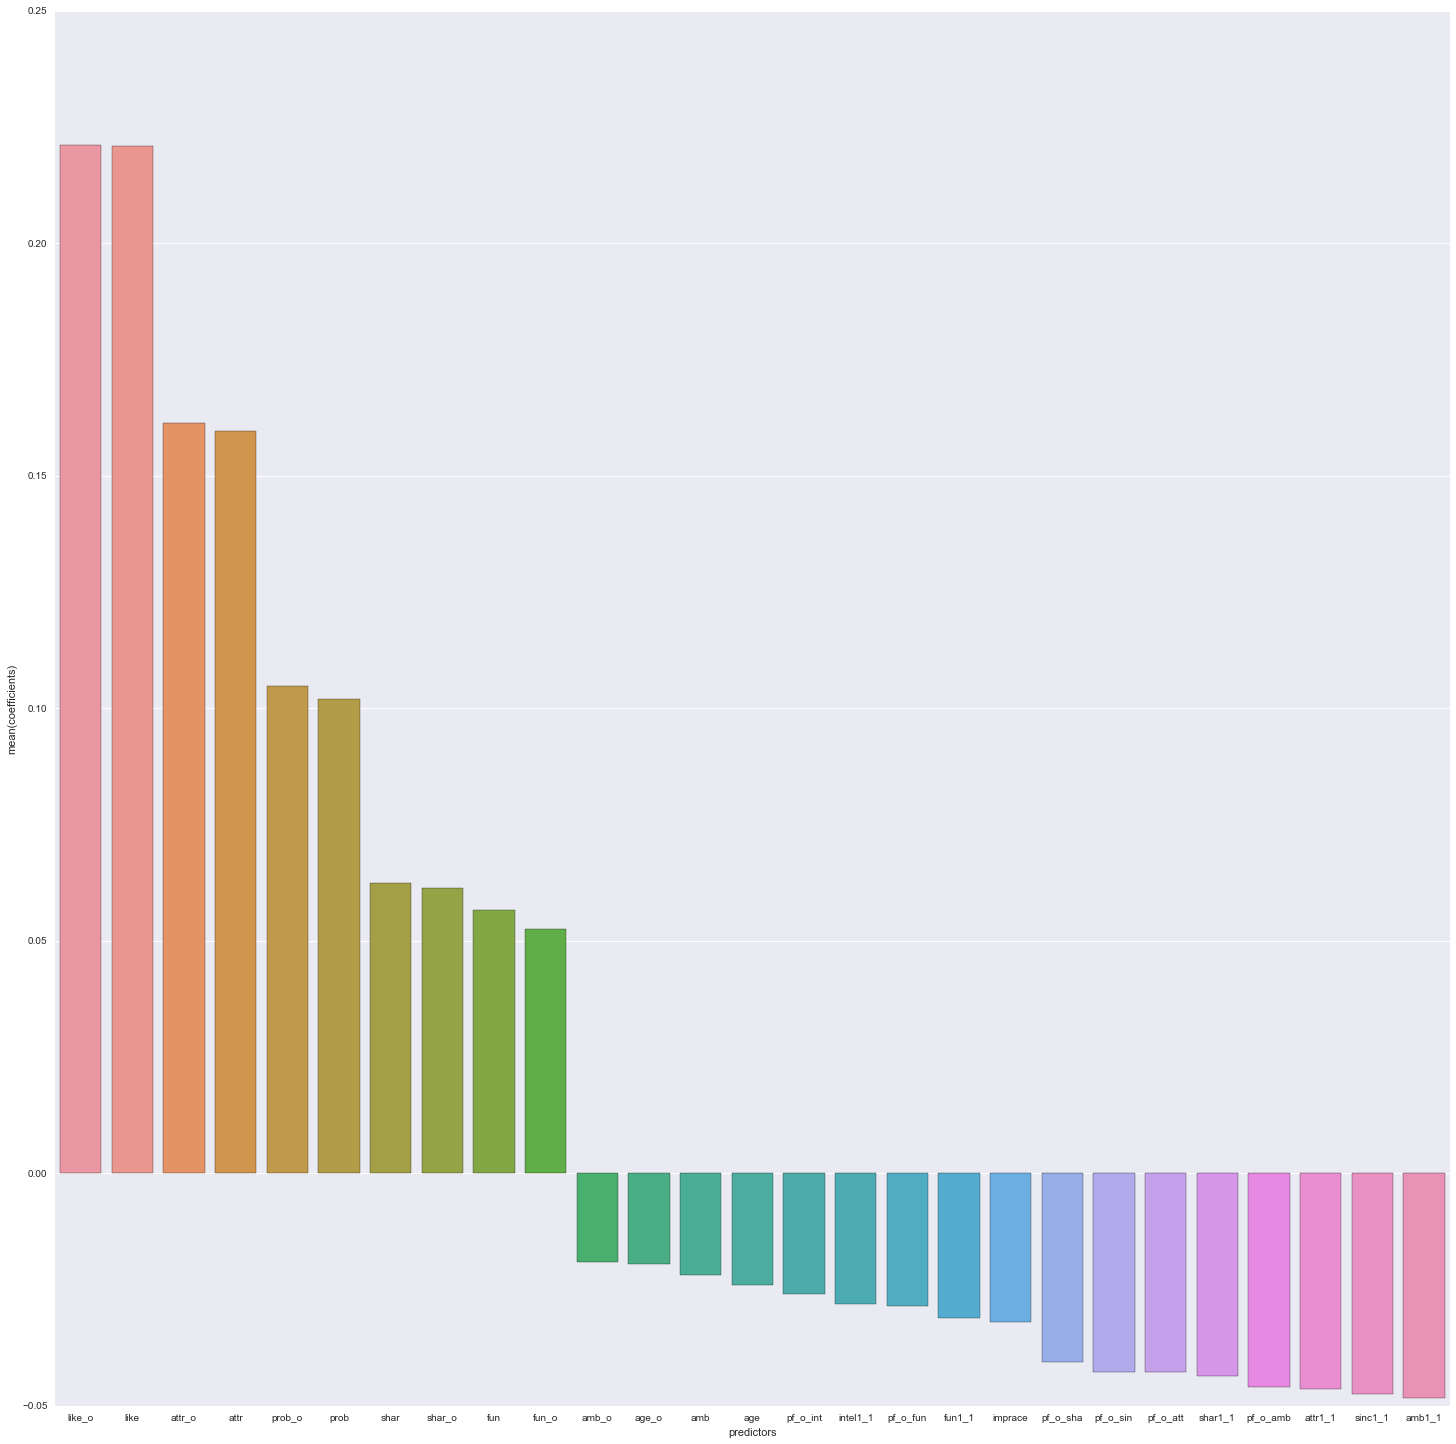

In [108]:
#plot coeffcients 

#mask out variabeles that were thrown out in lasso
not_0_mask = coef_df.coefficients != 0.000000
plot_pred = coef_df[not_0_mask]

#visualize

#setsize and plot
plot1 = plt.figure(figsize=(25,25))
ax = sns.barplot(x="predictors",y="coefficients",data=plot_pred)

##### This model does a good job of identifiying and  accurately predicting non-matches, but struggles to identify and accurately predict matches

In [58]:
#classification report
from sklearn.metrics import classification_report
print '\nclassification report'
# actual response values and your model's predictions
print classification_report(y_lr, y_pred)


classification report
             precision    recall  f1-score   support

        0.0       0.86      0.97      0.91      4486
        1.0       0.68      0.27      0.39       968

avg / total       0.83      0.85      0.82      5454



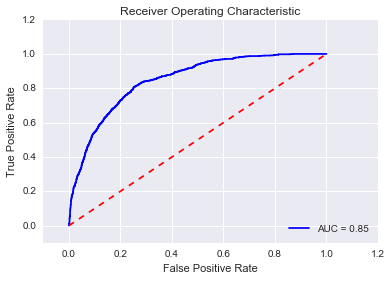

In [63]:
#plot ROC curve to visualize how well our model is doing in comparison to our baseline
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
% matplotlib inline


y_pp = lr_coef.predict_proba(x_lr)


# pass ytest and predictions
#three variables are assigned values based on what is passed ot the roc_curve function
                                            #actual response values and prediction probabilities
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_lr, y_pp[:,1].ravel())


roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
#model predictions
y_lrpre = lr_coef.predict(x_lr)

In [69]:
cmlr = pd.crosstab(y_lr,y_lrpre, rownames=["actual"],colnames = ["predicted"])
print cmlr

predicted   0.0   1.0
actual               
0.0        2614  1872
1.0         101   867


In [71]:
matches_df.match.value_counts()

0    4486
1     968
Name: match, dtype: int64

In [134]:
#true positive rate
true_pos_rate = round(2614/4486*100)
print "true positive rate (aka recall):",true_pos_rate

true positive rate (aka recall): 58.0


In [133]:
#false positive rate
false_pos_rate = round(101/968*100)
print "false positive rate (non matches predicted as matches):",false_pos_rate

false positive rate (non matches predicted as matches): 10.0


##### Since I am trying to predict matches and our first model is not doing well with that, I decided to test out a few more models. However my scoring metric will now be oriented towards precision and recall.  For the sake of brevity I will only show you the results of my Random Forest Classifier.

#### Random Forest Classifier with scoring focused on precision recall
<a id = "rfc"></a>

In [79]:
#create formula
# gender already dummy coded
dt_formula = """ match ~ gender + age + C(race) + C(goal) + C(date) + C(go_out) +
age_o + C(race_o) + attr_o + sinc_o +intel_o + fun_o + amb_o + shar_o + like_o + prob_o + 
+ imprace + imprelig + attr + sinc + intel + fun + amb + shar + like + prob + 
+ pf_o_att + pf_o_sin + pf_o_int + pf_o_fun + pf_o_amb + pf_o_sha + 
attr1_1 + sinc1_1 + intel1_1 + fun1_1 + amb1_1 + shar1_1 -1 """ 

In [80]:
# no need to normalize predictor values when using Random Forest Classifier
#create X and Y columns 
Y_dt,X_dt = patsy.dmatrices(dt_formula,data=matches_df, return_type = "dataframe")

In [81]:
print "baseline:",np.mean(Y_dt)

baseline: match    0.177484
dtype: float64


In [82]:
#put Y column in correct format for grid search
y_dt = np.ravel(Y_dt)

In [83]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

search_parameters_rfc = {
    #number of models in forest
    'n_estimators': [10,20,30],
    #puriy criterion
    'criterion': ['gini', 'entropy'],
    #tree levels
    'max_depth': [1,3,5, None],
    #max number of features for decisions
    'max_features': ['auto', 'sqrt', 'log2', None]
    }
rfc_est = GridSearchCV(rfc, search_parameters_rfc,scoring="average_precision")

In [84]:
#fit gridsearch
rf_grid = rfc_est.fit(X_dt,y_dt)

In [85]:
print"parameters of best model:", rfc_est.best_params_
print "best score of all models:", rfc_est.best_score_

parameters of best model: {'max_features': None, 'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 1}
best score of all models: 0.557179304412


In [86]:
#instantiate new model to pull out info

rfc2 = RandomForestClassifier(max_features = None, n_estimators =30, criterion =  'gini', max_depth= 5)

In [87]:
#fit model
rfc2.fit(X_dt,y_dt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
#cross validate model
from sklearn.cross_validation import cross_val_score

rfc2_scores = cross_val_score(rfc2,X_dt,y_dt, scoring = "average_precision",cv = 3)

In [89]:
print "all model scores", rfc2_scores
print "mean of model scores",np.mean(rfc2_scores)
print "baseline",np.mean(y_dt)

all model scores [ 0.59840176  0.55999201  0.50230172]
mean of model scores 0.553565165328
baseline 0.177484415108


##### Our Random Forest Classifier does a slightly better job identifying matches and predicting them...

In [91]:
#classification report
from sklearn.metrics import classification_report
print '\nclassification report'
# actual response values and your model's predictions
print classification_report(y_dt, rfc2.predict(X_dt))


classification report
             precision    recall  f1-score   support

        0.0       0.87      0.98      0.92      4486
        1.0       0.76      0.34      0.46       968

avg / total       0.85      0.86      0.84      5454



In [125]:
#extract important features and visualize their importance
forest_importances = rfc2.feature_importances_
forest_feature_names = X_dt.columns
features_forest_df = pd.DataFrame({"features":forest_feature_names,"importance":forest_importances})
features_forest_df.sort_values(["importance"], ascending=False, inplace = True)
ten = features_forest_df.head(10)

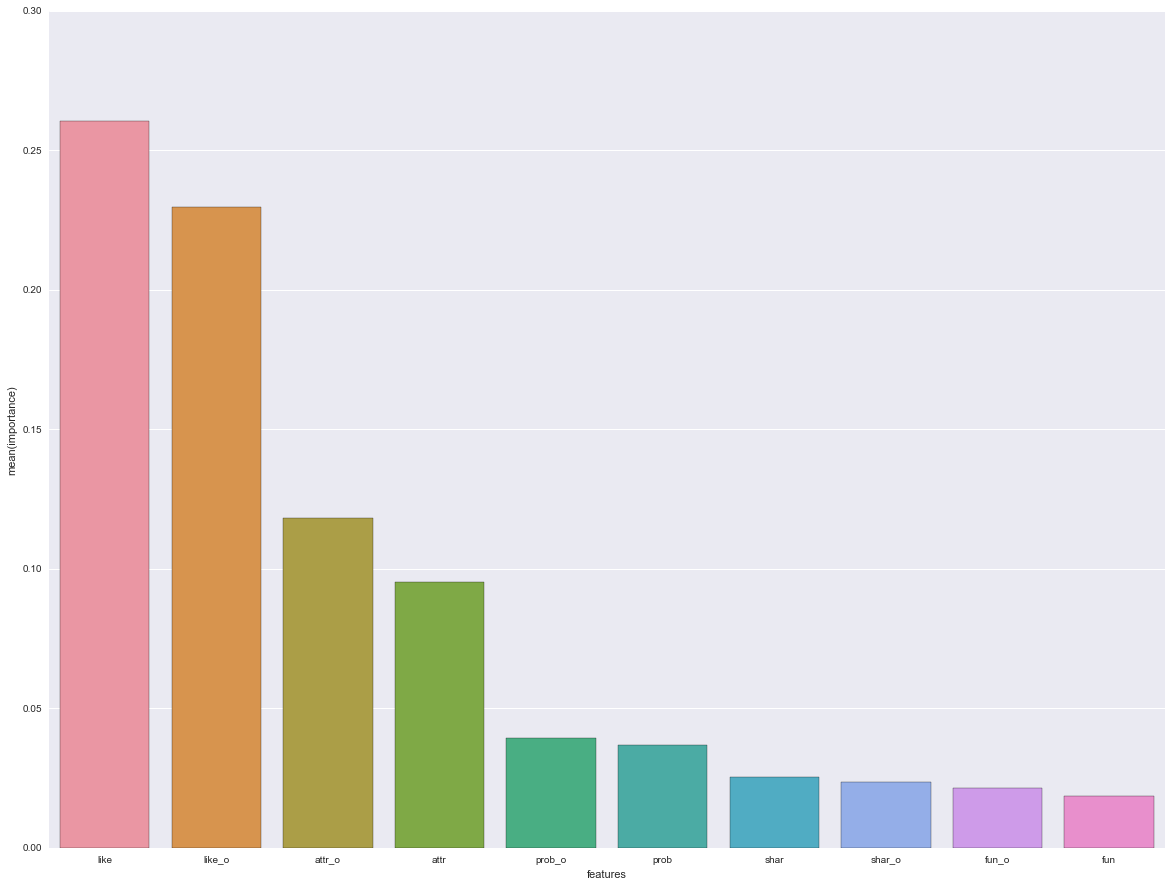

In [126]:
#visualize random forest; top ten most important variables
plot2 = plt.figure(figsize=(20,15))
ax2 = sns.barplot(x="features",y="importance",data=ten)

In [99]:
# prep for confusion matrix 
# pass prediction function predictor columns
y_rfc2pre = rfc2.predict(X_dt)
from sklearn.metrics import confusion_matrix
print '\nConfusion matrix:'
cmrfc2 = pd.crosstab(y_dt,y_rfc2pre, rownames=["actual"],colnames = ["predicted"]) 
print cmrfc2


Confusion matrix:
predicted   0.0  1.0
actual              
0.0        4381  105
1.0         643  325


In [130]:
#true positive rate
true_pos_rate_rfc = round(4381/4486*100)
print not a match recall/add to notes
print "true positive rate Random Forest Classifier(aka recall):",true_pos_rate_rfc

true positive rate Random Forest Classifier(aka recall): 98.0


In [132]:
#66% of the time our model predicts a non match when in actuality there was a match
#false positive rate
false_pos_rate_rfc = round(643/968*100)
print "false positive rate (non matches predicted as match) :",false_pos_rate_rfc

false positive rate (non matches predicted as match) : 66.0


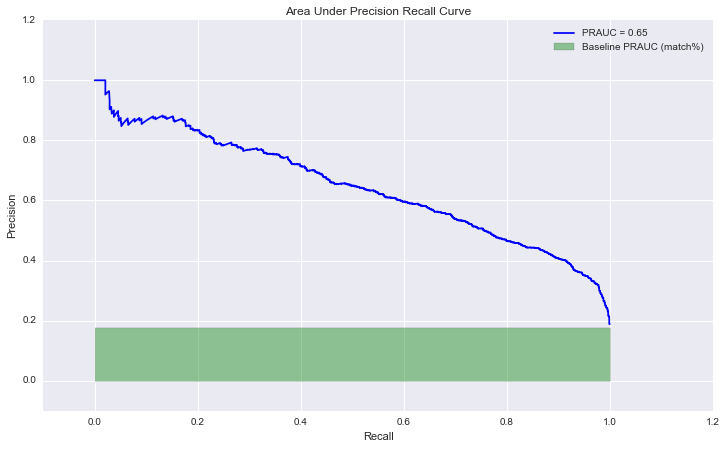

In [127]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from matplotlib import pyplot as plt
% matplotlib inline

#y_pp = lilac_tree.predict_proba(X_dt)
y_rfcpp = rfc2.predict_proba(X_dt)

plt.figure(figsize=(12,7))


# passs ytest and predictions
#three variables are assigned values based on what is passed ot the roc_curve function
                                            #actual response values and prediction probabilities
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_lr, y_pp[:,1].ravel())

# we changed the matches to zero to get around that weird precision bug thing.
precision, recall, thresholds = precision_recall_curve(y_dt, y_rfcpp[:,1].ravel())

#roc_auc = auc(false_positive_rate, true_positive_rate)

pr_auc = average_precision_score(y_dt, y_rfcpp[:,1].ravel())

#plt.title('Receiver Operating Characteristic')
plt.title('Area Under Precision Recall Curve')

label=('PRAUC = %0.2f'% pr_auc)

#plt.plot(false_positive_rate, true_positive_rate, 'b',
plt.plot(recall, precision, 'b', label=label)


plt.fill_between(recall, 0, np.tile(np.mean(y_dt), len(recall)), 
                 facecolor='green', alpha=0.4, label='Baseline PRAUC (match%)')

plt.legend(loc='upper right')
#plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
# plt.ylabel('True Positive Rate')
plt.ylabel('Precision')
# plt.xlabel('False Positive Rate')
plt.xlabel('Recall')
plt.show()